# Exploratory Analysis
1. Post Volume Over Time: Track the number of posts and comments by day, week, or month to observe trends or spikes in activity. This can highlight when certain topics become especially popular.
2. Top Authors and Engagement: Identify authors with the highest number of posts or comments and examine engagement metrics (like average upvotes or comment counts).
3. Subreddit Comparisons: Compare metrics like post frequency, average engagement, and sentiment across different subreddits to see how discussions vary by community.

## Connect to Database

In [4]:
import psycopg2
import pandas as pd
import db_config

def connect_db():
    try:
        conn = psycopg2.connect(**db_config.db_params)
        print("Database connection successful")
        return conn
    except Exception as e:
        print("Database connection failed:", e)

def fetch_data(query):
    conn = connect_db()
    try:
        # Read query result into a DataFrame
        df = pd.read_sql_query(query, conn)
        print(f"Fetched {len(df)} records")
    except Exception as e:
        print("Failed to fetch data:", e)
        df = pd.DataFrame()  # Return an empty DataFrame on failure
    finally:
        conn.close()  # Ensure connection is closed after the query
    return df

In [8]:
# Sample query to fetch data
query = "SELECT * FROM posts LIMIT 100;"
posts_df = fetch_data(query)

# Display the first few rows
posts_df.head()

Database connection successful
Fetched 100 records


/var/folders/y4/mfl699z170q3dxfrxlvx6xqr0000gn/T/ipykernel_20442/4133173662.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,post_id,subreddit,author,title,self_text,url,created_utc,score,num_comments,flair
0,1gbwk4i,news,Chi-Guy86,Elon Musk has been in regular contact with Put...,,https://www.theguardian.com/technology/2024/oc...,2024-10-25 11:11:14,48350,2099,None
1,1gblnfk,worldnews,WorldNewsMods,/r/WorldNews Live Thread: Russian Invasion of ...,,https://www.reddit.com/live/18hnzysb1elcs,2024-10-25 00:02:31,781,197,Russia/Ukraine
2,1gbthc0,politics,PoliticsModeratorBot,"/r/Politics' 2024 US Elections Live Thread, Pa...",,https://www.reddit.com/live/1db9knzhqzdfp/,2024-10-25 08:50:46,121,8517,None
3,1gc8j8q,technology,upyoars,Donald Trump meets with Blue Origin execs the ...,,https://www.theverge.com/2024/10/25/24279851/d...,2024-10-25 20:06:33,1467,93,Politics
4,1dqa2qv,conspiracy,Amos_Quito,"A ""glitch"" in the system? Threads are being po...",I made a comment in one of the threads that ha...,https://www.reddit.com/r/conspiracy/comments/1...,2024-06-27 23:31:02,594,329,None


In [12]:
posts_df.columns

Index(['post_id', 'subreddit', 'author', 'title', 'self_text', 'url',
       'created_utc', 'score', 'num_comments', 'flair'],
      dtype='object')

In [9]:
# Display summary statistics
posts_df.describe()

,created_utc,score,num_comments
count,100,100.000000,100.000000
mean,2024-10-22 07:54:13.169999616,7229.840000,482.680000
min,2024-06-27 23:31:02,51.000000,0.000000
25%,2024-10-22 09:05:49.750000128,1010.500000,71.500000
50%,2024-10-23 18:38:41.500000,2755.000000,174.500000
75%,2024-10-25 03:26:44,6950.750000,523.250000
max,2024-10-25 21:26:27,51058.000000,8517.000000
std,NaN,11297.243462,970.679965


In [10]:
# Check for missing values
posts_df.isnull().sum()

post_id          0
subreddit        0
author           0
title            0
self_text        0
url              0
created_utc      0
score            0
num_comments     0
flair           80
dtype: int64

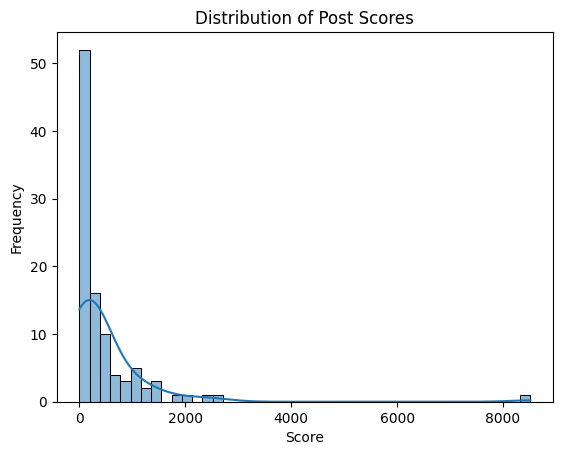

In [13]:
# Plot distribution of post scores
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(posts_df['num_comments'], kde=True)
plt.title("Distribution of Post Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

Database connection successful
Fetched 1666 records


/var/folders/y4/mfl699z170q3dxfrxlvx6xqr0000gn/T/ipykernel_20442/4133173662.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


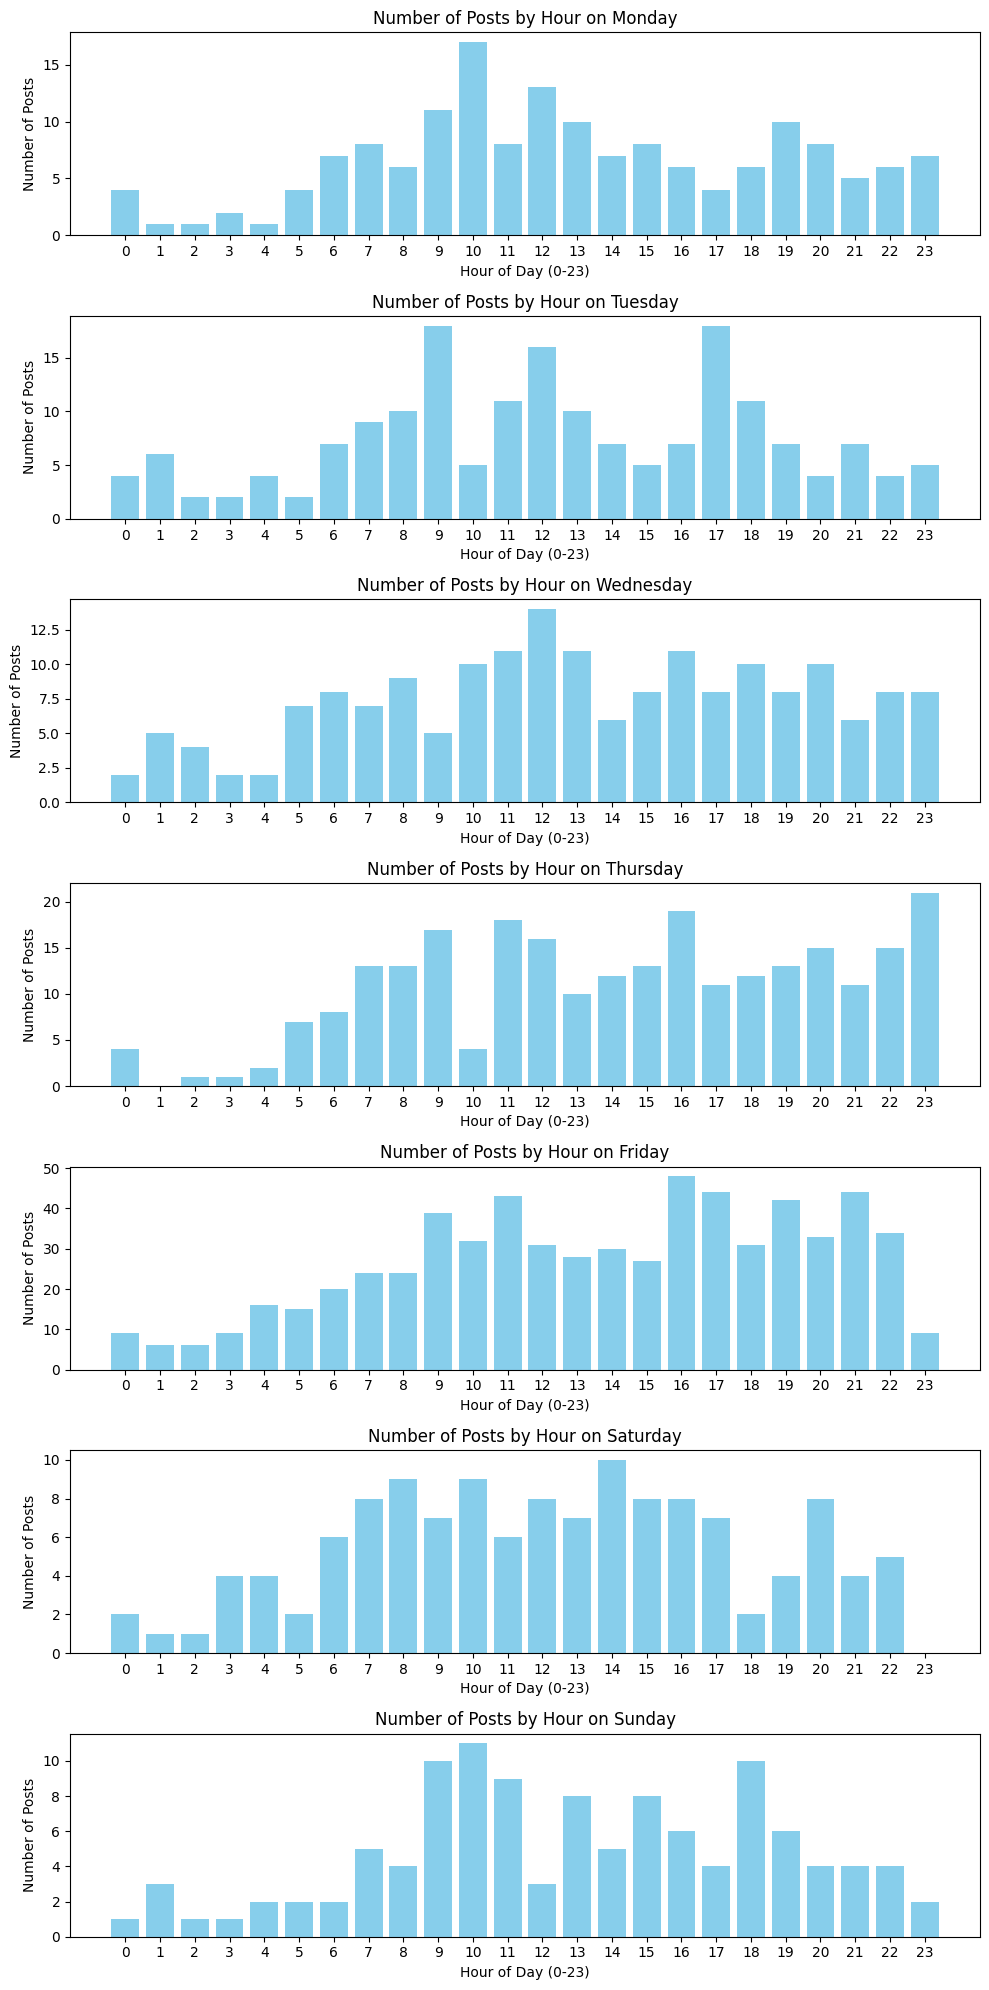

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Query to fetch posts data
query = "SELECT created_utc FROM posts;"
posts_df = fetch_data(query)  # Assuming fetch_data function retrieves query results as DataFrame

# Convert `created_utc` to datetime and extract day of week and hour
posts_df['created_utc'] = pd.to_datetime(posts_df['created_utc'])
posts_df['day_of_week'] = posts_df['created_utc'].dt.day_name()  # Get day name (e.g., Monday)
posts_df['hour'] = posts_df['created_utc'].dt.hour

# Group by day of week and hour, then count posts
grouped_data = posts_df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# Define the order of days for consistent plotting
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Set up the figure and axes for 7 subplots (one for each day of the week)
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 20))

# Plot each day's hourly post count
for i, day in enumerate(days_order):
    ax = axes[i]
    hourly_counts = grouped_data.loc[day]
    ax.bar(hourly_counts.index, hourly_counts.values, color='skyblue')
    ax.set_title(f"Number of Posts by Hour on {day}")
    ax.set_ylabel("Number of Posts")
    ax.set_xlabel("Hour of Day (0-23)")
    
    # Set x-ticks and labels explicitly for each subplot
    ax.set_xticks(range(24))
    ax.set_xticklabels([str(hour) for hour in range(24)], rotation=0)

plt.tight_layout()
plt.show()


Database connection successful
Fetched 1666 records


/var/folders/y4/mfl699z170q3dxfrxlvx6xqr0000gn/T/ipykernel_20442/4133173662.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


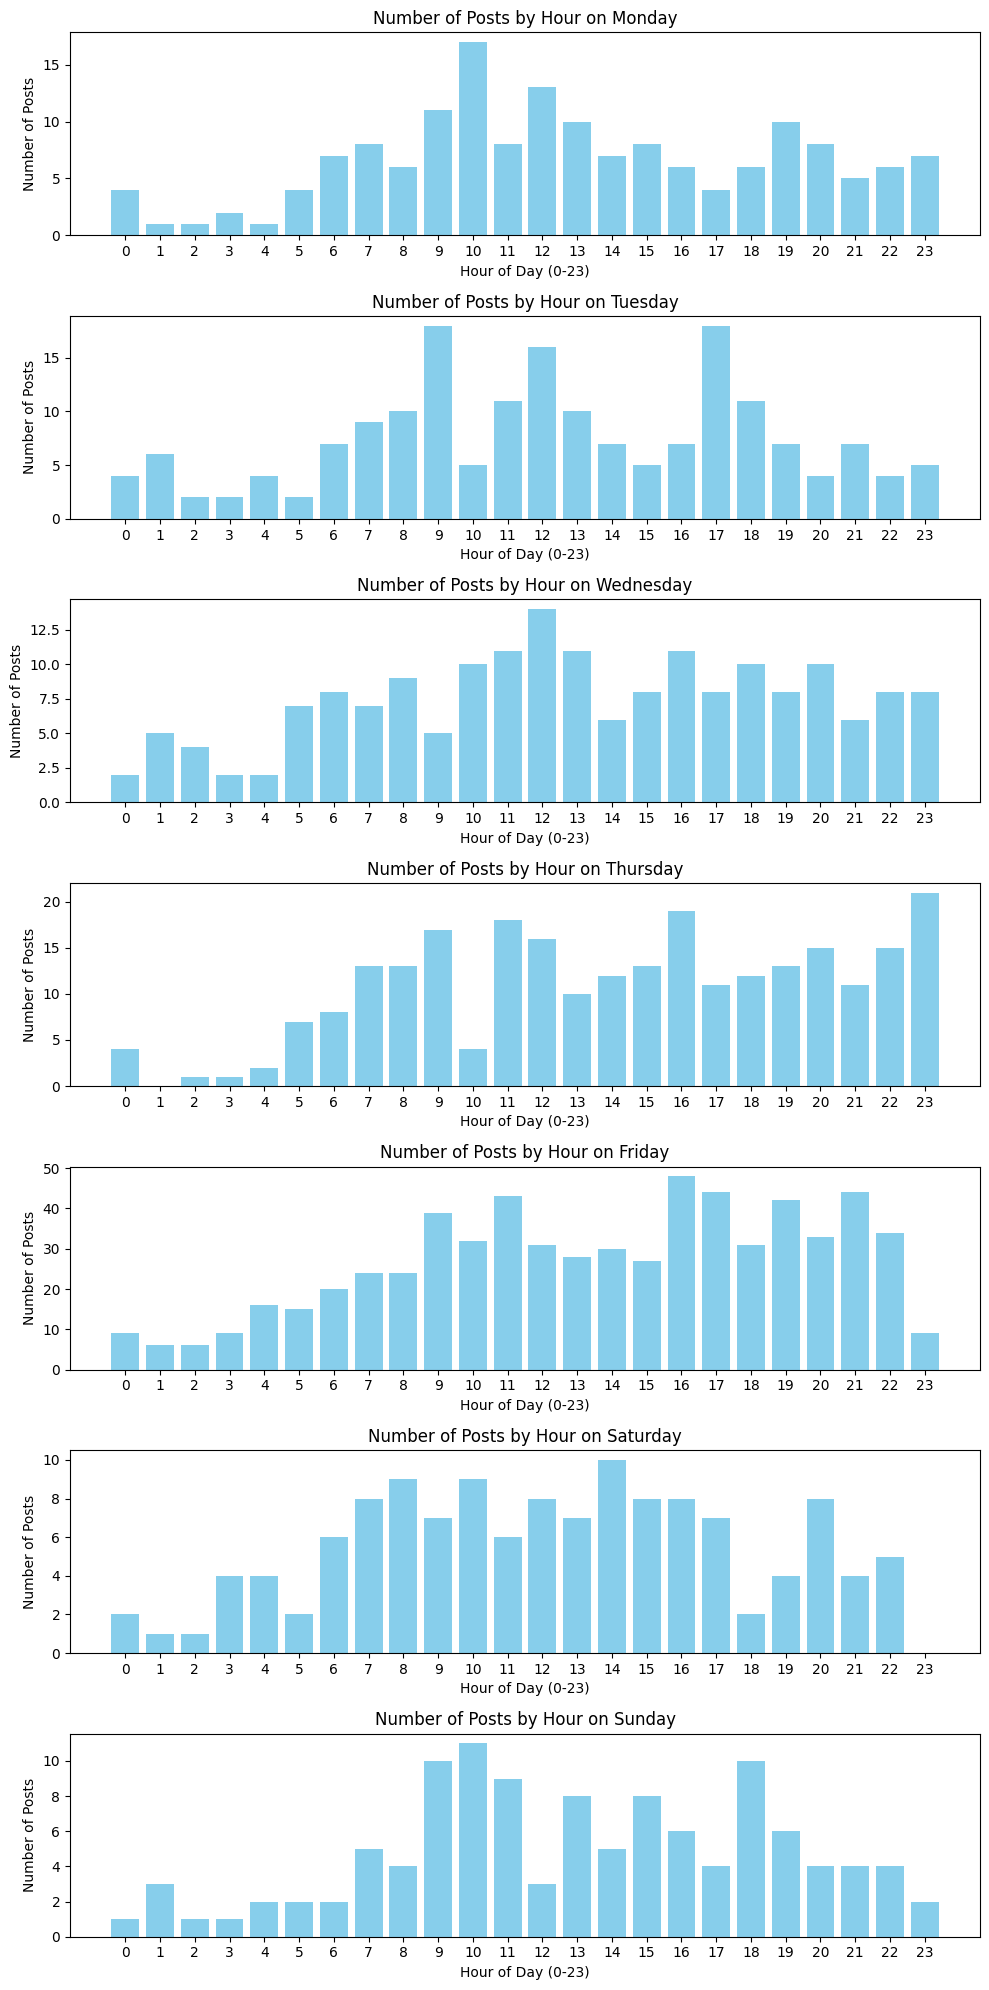

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Query to fetch posts data
query = "SELECT created_utc FROM posts;"
posts_df = fetch_data(query)  # Assuming fetch_data function retrieves query results as DataFrame

# Convert `created_utc` to datetime and extract day of week and hour
posts_df['created_utc'] = pd.to_datetime(posts_df['created_utc'])
posts_df['day_of_week'] = posts_df['created_utc'].dt.day_name()  # Get day name (e.g., Monday)
posts_df['hour'] = posts_df['created_utc'].dt.hour

# Group by day of week and hour, then count posts
grouped_data = posts_df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# Define the order of days for consistent plotting
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Set up the figure and axes for 7 subplots (one for each day of the week)
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 20))

# Plot each day's hourly post count
for i, day in enumerate(days_order):
    ax = axes[i]
    hourly_counts = grouped_data.loc[day]
    ax.bar(hourly_counts.index, hourly_counts.values, color='skyblue')
    ax.set_title(f"Number of Posts by Hour on {day}")
    ax.set_ylabel("Number of Posts")
    ax.set_xlabel("Hour of Day (0-23)")
    
    # Set x-ticks and labels explicitly for each subplot
    ax.set_xticks(range(24))
    ax.set_xticklabels([str(hour) for hour in range(24)], rotation=0)

plt.tight_layout()
plt.show()
